In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')


In [2]:

dateparse = lambda x: np.NaN if x == 'nan' else pd.datetime.strptime(x, '%H:%M')
accidents = pd.read_csv("input_data/accidents_2012_to_2014.csv", parse_dates=['Time'], date_parser=dateparse)
print("The number of rows in the dataset", accidents.shape)


#  Dropping the attributes I wont need
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'LSOA_of_Accident_Location',
                'Longitude', 'Latitude', 'Police_Force', 'Accident_Index', '2nd_Road_Number',
                'Number_of_Casualties', 'Date', 'Local_Authority_(District)', '1st_Road_Number',
                'Local_Authority_(Highway)', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
               axis=1, inplace=True)

fatal_accidents = accidents#[accidents['Accident_Severity'] == 1]
#fatal_accidents.drop(['Accident_Severity'], axis=1, inplace=True)
del accidents



The number of rows in the dataset (464697, 33)


In [3]:
print("The number of fatal accidents", fatal_accidents.shape)
for col in fatal_accidents:
    fatal_accidents = fatal_accidents[fatal_accidents[col] != -1]
print("The number of row without missing values\n", fatal_accidents.shape)

print("Printing null values in the data\n", fatal_accidents.isnull().sum())


print("The number of fatal accidents", fatal_accidents.shape)
for col in fatal_accidents:
    fatal_accidents = fatal_accidents[fatal_accidents[col] != -1]

print(fatal_accidents.head())


The number of fatal accidents (464697, 18)


The number of row without missing values
 (282903, 18)


Printing null values in the data
 Accident_Severity                               0
Number_of_Vehicles                              0
Day_of_Week                                     0
Time                                            5
1st_Road_Class                                  0
Road_Type                                       0
Speed_limit                                     0
Junction_Detail                            282903
Junction_Control                              162
2nd_Road_Class                                  0
Pedestrian_Crossing-Human_Control               0
Pedestrian_Crossing-Physical_Facilities         0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                       444
Special_Conditions_at_Site                      0
Carriageway_Hazards                             0
Urban_or_Rural_Area                             0
dtype: int64
The number of fatal accidents (282903, 18)


   Accident_Severity  Number_of_Vehicles  Day_of_Week                Time  \
0                  3                   2            5 1900-01-01 20:35:00   
1                  3                   2            4 1900-01-01 17:00:00   
2                  3                   2            3 1900-01-01 10:07:00   
3                  3                   1            4 1900-01-01 12:20:00   
4                  3                   1            3 1900-01-01 20:24:00   

   1st_Road_Class           Road_Type  Speed_limit  Junction_Detail  \
0               3  Single carriageway           30              NaN   
1               4  Single carriageway           30              NaN   
2               3      One way street           30              NaN   
3               5  Single carriageway           30              NaN   
4               4  Single carriageway           30              NaN   

           Junction_Control  2nd_Road_Class Pedestrian_Crossing-Human_Control  \
0  Automatic traffic signal  

In [4]:

#  Drop Junction_Detail not value for fatal accident
fatal_accidents.drop(['Junction_Detail'], axis=1, inplace=True)

#Drop null values
fatal_accidents.dropna(inplace=True)
print("Printing null values in the data after removing Nan values\n", fatal_accidents.isnull().sum())

#fatal_accidents.drop(['Time'], axis=1, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fatal_accidents.describe(include='all'))


Printing null values in the data after removing Nan values
 Accident_Severity                          0
Number_of_Vehicles                         0
Day_of_Week                                0
Time                                       0
1st_Road_Class                             0
Road_Type                                  0
Speed_limit                                0
Junction_Control                           0
2nd_Road_Class                             0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Carriageway_Hazards                        0
Urban_or_Rural_Area                        0
dtype: int64


        Accident_Severity  Number_of_Vehicles    Day_of_Week  \
count       282293.000000       282293.000000  282293.000000   
unique                NaN                 NaN            NaN   
top                   NaN                 NaN            NaN   
freq                  NaN                 NaN            NaN   
first                 NaN                 NaN            NaN   
last                  NaN                 NaN            NaN   
mean             2.856465            1.868130       4.124087   
std              0.370102            0.593183       1.893753   
min              1.000000            1.000000       1.000000   
25%              3.000000            2.000000       3.000000   
50%              3.000000            2.000000       4.000000   
75%              3.000000            2.000000       6.000000   
max              3.000000           11.000000       7.000000   

                       Time  1st_Road_Class           Road_Type  \
count                282293   282293

In [5]:

fatal_accidents['Urban_or_Rural_Area'] = fatal_accidents['Urban_or_Rural_Area'].astype('category')
rc = np.asarray(["_", 'Motorway', 'A(M)', 'A', 'B', 'C', 'Unclassified'])
fatal_accidents['2nd_Road_Class'] = rc[fatal_accidents['2nd_Road_Class'].values.astype('int32')]
fatal_accidents['2nd_Road_Class'] = fatal_accidents['2nd_Road_Class'].astype('category')
fatal_accidents['Speed_limit'] = fatal_accidents['Speed_limit'].astype('category')

fatal_accidents['1st_Road_Class'] = rc[fatal_accidents['1st_Road_Class'].values.astype('int32')]
fatal_accidents['1st_Road_Class'] = fatal_accidents['2nd_Road_Class'].astype('category')
fatal_accidents['Number_of_Vehicles'] = fatal_accidents['Number_of_Vehicles'].astype('category')
dw = np.asarray(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fatal_accidents['Day_of_Week'] = pd.cut(fatal_accidents['Day_of_Week'].values.astype('int32'), 
                                        [0,1,2,3,4,5,6,7], labels=dw, include_lowest=True)
fatal_accidents['Day_of_Week'] = fatal_accidents['Day_of_Week'].astype('category')

urb = np.asarray(['_', 'Urban Area', 'Rural Area'])
fatal_accidents['Urban_or_Rural_Area'] = urb[fatal_accidents['Urban_or_Rural_Area']]
fatal_accidents['Urban_or_Rural_Area'] = fatal_accidents['Urban_or_Rural_Area'].astype('category')
fatal_accidents['Accident_Severity'] = fatal_accidents['Accident_Severity'].astype('category')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fatal_accidents.describe(include='all'))

fatal_accidents.reset_index(drop=True, inplace=True)


        Accident_Severity  Number_of_Vehicles Day_of_Week  \
count            282293.0            282293.0      282293   
unique                3.0                11.0           7   
top                   3.0                 2.0    Saturday   
freq             243756.0            195514.0       46747   
first                 NaN                 NaN         NaN   
last                  NaN                 NaN         NaN   

                       Time 1st_Road_Class           Road_Type  Speed_limit  \
count                282293         282293              282293     282293.0   
unique                 1439              6                   6          6.0   
top     1900-01-01 17:00:00   Unclassified  Single carriageway         30.0   
freq                   2906         189525              212158     214059.0   
first   1900-01-01 00:01:00            NaN                 NaN          NaN   
last    1900-01-01 23:59:00            NaN                 NaN          NaN   

               Jun

In [6]:
from prometheus_client import values
date_time = pd.to_datetime(fatal_accidents['Time'])
hours = []
for t in date_time:
    hours.append(t.hour)

date_time = pd.Series(data=hours)
print(date_time.head(15))
date_time = pd.cut(date_time, [0, 5.9, 11.9, 17.9, 23.9], labels=['early_morning', 
                                              'morning', 'afternoon', 'evening'],
       include_lowest=True)
print(date_time.head(15))


0     20
1     17
2     10
3     12
4     20
5      7
6     14
7     11
8     13
9     19
10    17
11     5
12     8
13    17
14    18
dtype: int64
0           evening
1         afternoon
2           morning
3         afternoon
4           evening
5           morning
6         afternoon
7           morning
8         afternoon
9           evening
10        afternoon
11    early_morning
12          morning
13        afternoon
14          evening
dtype: category
Categories (4, object): [early_morning < morning < afternoon < evening]


In [7]:

fatal_accidents['Time'] = date_time


  Accident_Severity Number_of_Vehicles Day_of_Week       Time 1st_Road_Class  \
0                 3                  2      Friday    evening              C   
1                 3                  2    Thursday  afternoon   Unclassified   
2                 3                  2   Wednesday    morning   Unclassified   
3                 3                  1    Thursday  afternoon   Unclassified   
4                 3                  1   Wednesday    evening   Unclassified   

            Road_Type Speed_limit          Junction_Control 2nd_Road_Class  \
0  Single carriageway          30  Automatic traffic signal              C   
1  Single carriageway          30   Giveway or uncontrolled   Unclassified   
2      One way street          30   Giveway or uncontrolled   Unclassified   
3  Single carriageway          30   Giveway or uncontrolled   Unclassified   
4  Single carriageway          30   Giveway or uncontrolled   Unclassified   

  Pedestrian_Crossing-Human_Control  \
0          

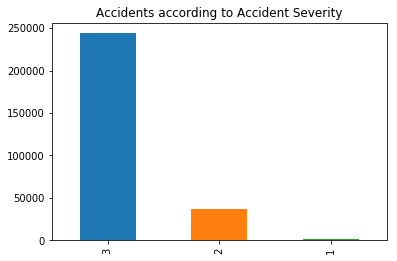

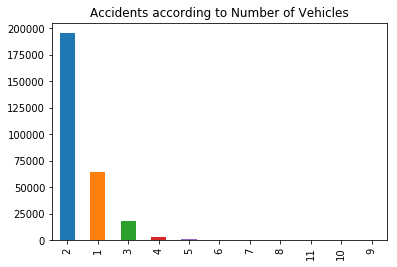

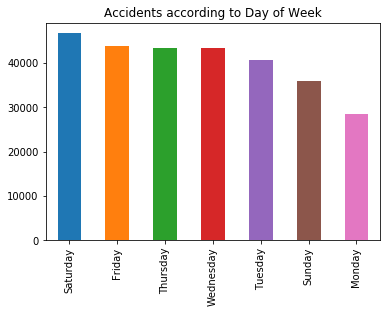

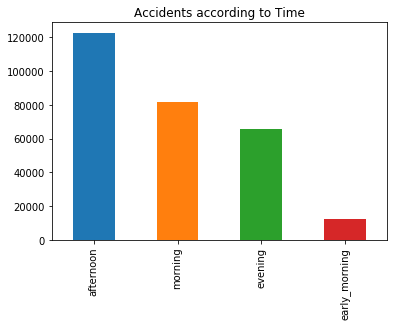

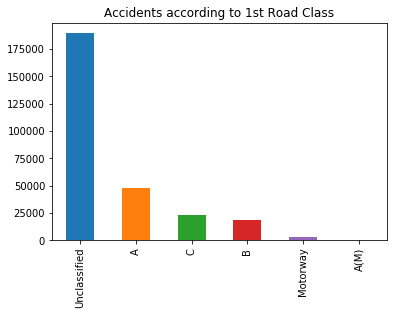

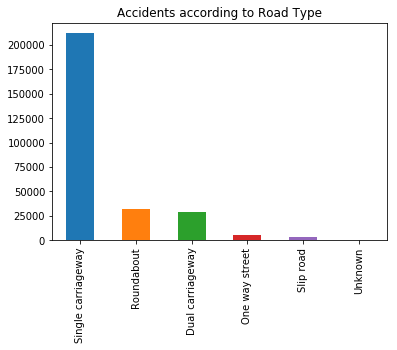

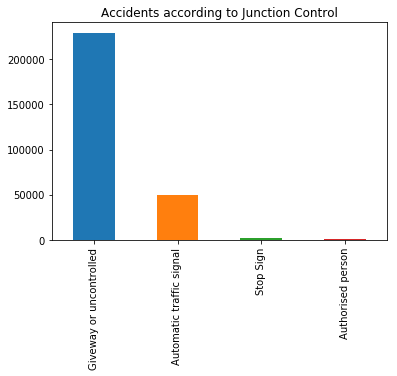

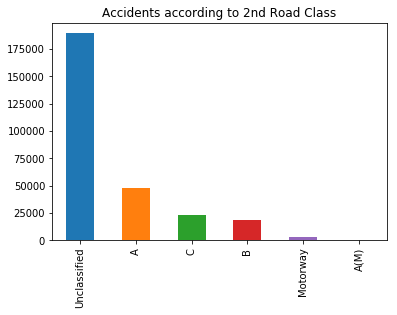

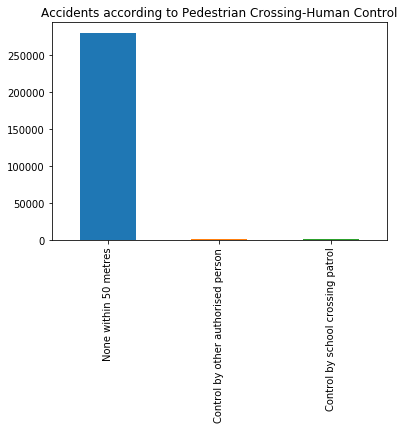

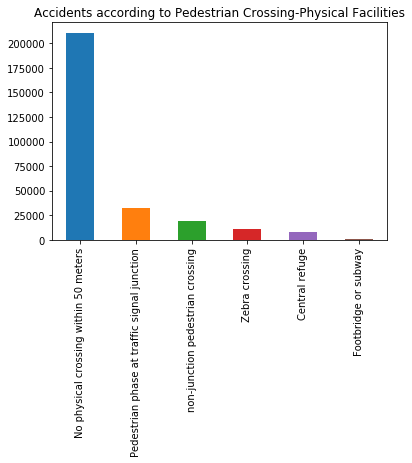

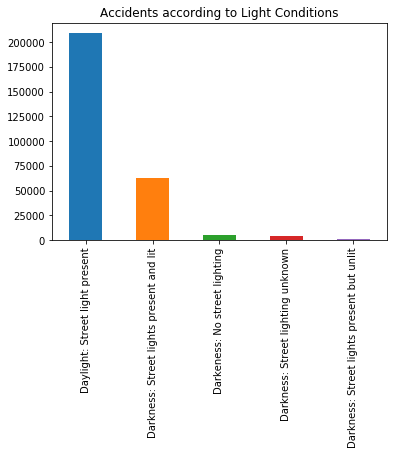

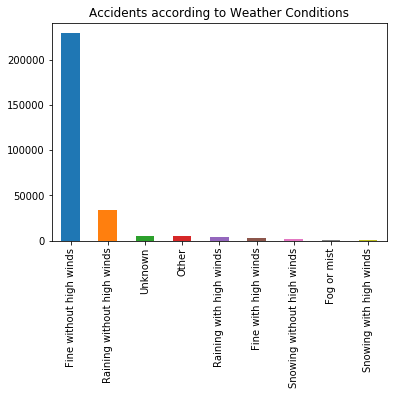

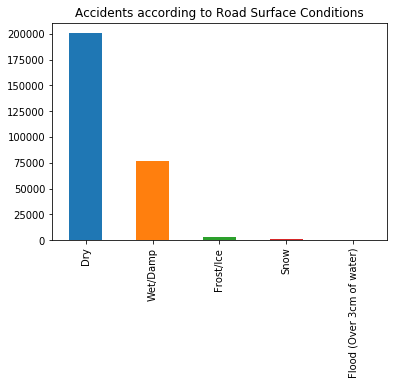

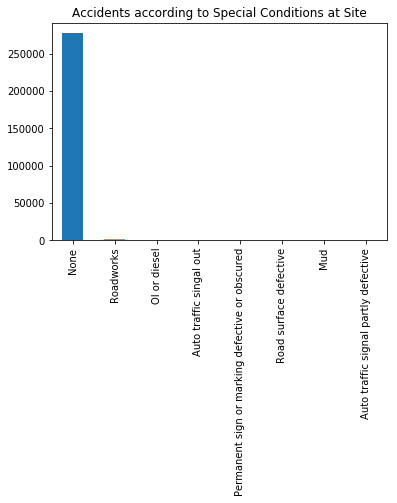

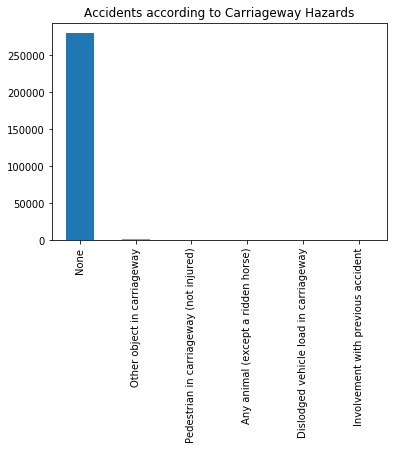

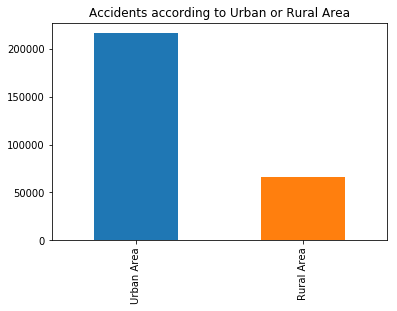

In [9]:

print(fatal_accidents.head(5))

for i, att in enumerate(fatal_accidents):
    if att != 'Speed_limit':
        plt.figure(i)
        fatal_accidents[att].value_counts().plot(kind='bar', title="Accidents according to "+" ".join(att.split('_')))
        plt.savefig('figures_task3/plot_%s.png'%att, bbox_inches='tight')


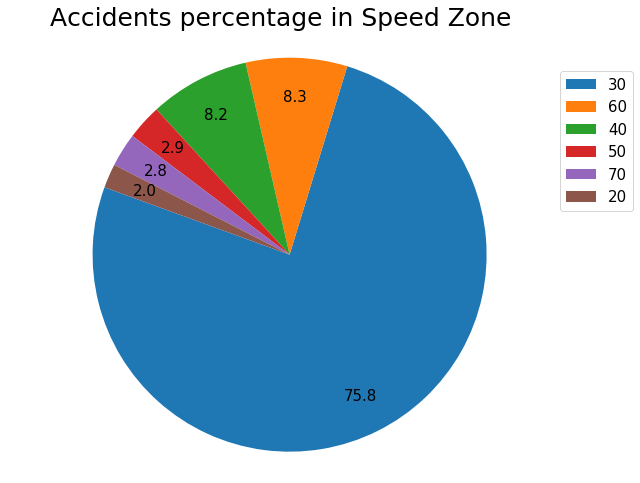

In [10]:
speed = fatal_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 
plt.figure(figsize=(10, 8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f', pctdistance=0.8, labeldistance=1.9, explode=explode, shadow=False, startangle=160,textprops={'fontsize': 15})

plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5, .9, 'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.savefig('figures/plot_Speed_limit.png', bbox_inches='tight')

In [11]:
fatal_accidents.to_csv('output_data/preprocessed_fatal_accidents_task3.csv', index=False, sep=',')